<a href="https://colab.research.google.com/github/n-fleischmann/DS4400-HW-Data/blob/main/Noah_Fleischmann_ML_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 3

Importing Data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as m
from math import e
import numpy as np

## Importing Data

In [3]:
raw_url = "https://raw.githubusercontent.com/n-fleischmann/hw_data/main/spambase.data"
raw_df = pd.read_csv(raw_url, names=list(range(58)))
raw_df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
ys = raw_df[57]
xs = raw_df.drop(57, axis=1)

x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.25, random_state = 2001)

## Question 1

In [5]:
logit = LogisticRegression(random_state = 0)
logit.fit(x_train, y_train)

logit_y_test_pred = logit.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [6]:
m.confusion_matrix(y_test, logit_y_test_pred)

array([[659,  43],
       [ 39, 410]])

In [7]:
print(m.classification_report(y_test, logit_y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       702
           1       0.91      0.91      0.91       449

    accuracy                           0.93      1151
   macro avg       0.92      0.93      0.93      1151
weighted avg       0.93      0.93      0.93      1151



In [8]:
m.f1_score(y_test, logit_y_test_pred)

0.9090909090909092

In [168]:
logit.coef_.max()

1.170310978564154

In [9]:
print(logit.coef_)

[[-7.93453718e-02 -1.94561025e-01  1.66442272e-01  2.28632297e-01
   8.49121665e-01  4.89473055e-01  1.17031098e+00  8.49293630e-01
   2.50000521e-01  1.48388620e-01  1.83214408e-01  2.69417559e-02
   1.25254421e-01  6.80395790e-02  2.74566653e-01  1.08530901e+00
   6.42691761e-01  2.93857990e-01  6.94614414e-02  5.66064557e-01
   1.95351638e-01  2.49494634e-01  1.09173820e+00  6.40586615e-01
  -2.48787496e+00 -1.31671939e+00 -3.53302905e+00 -3.41078611e-01
  -6.09691406e-01 -4.04220359e-01 -3.87383024e-01 -2.15991992e-01
  -7.00113264e-01 -2.30484611e-01 -5.90537789e-01 -5.18797854e-02
  -4.95483958e-01 -1.51590538e-01 -4.61980762e-01 -2.95926936e-01
  -3.74413203e-01 -1.01581592e+00 -2.89020263e-01 -5.72503310e-01
  -8.70183933e-01 -1.40669903e+00 -9.26623255e-02 -3.11363469e-01
  -4.71367768e-01 -2.15318189e-01 -1.30459133e-01  3.30756347e-01
   7.62000051e-01  2.29208772e-01  7.06870607e-02  1.09839172e-02
   4.56317824e-04]]


In [10]:
logit_test_probas = pd.DataFrame(logit.predict_proba(x_test)[:, 1]) #only want prob y=1

thresholds = [0.25, 0.5, 0.75, 0.9]

for thresh in thresholds:
  y_preds = logit_test_probas.applymap(lambda x: 1 if x > thresh else 0 )
  print(f"Threshold: {thresh}  \t Acc: {m.accuracy_score(y_test, y_preds)} \t Pres: {m.precision_score(y_test, y_preds)} \t Rec: {m.recall_score(y_test, y_preds)}")

Threshold: 0.25  	 Acc: 0.8879235447437012 	 Pres: 0.791970802919708 	 Rec: 0.9665924276169265
Threshold: 0.5  	 Acc: 0.9287576020851434 	 Pres: 0.9050772626931567 	 Rec: 0.9131403118040089
Threshold: 0.75  	 Acc: 0.891398783666377 	 Pres: 0.945054945054945 	 Rec: 0.7661469933184856
Threshold: 0.9  	 Acc: 0.8279756733275413 	 Pres: 0.966542750929368 	 Rec: 0.579064587973274


## Question 2

In [11]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [12]:
def update_theta(theta_old, X, y, lr):
  # X : n x d
  # theta: d x 1 --> X @ theta: n x 1
  # X.T @ y = d x n @ n x 1: d x 1
  tmp = sigmoid(X @ theta_old)
  grad = (X.T @ (tmp - y))
  return theta_old - (lr * grad)

In [13]:
#data_conversion

x_train_np = x_train.to_numpy()
x_test_np = x_test.to_numpy()

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

x_train_np.shape

(3450, 57)

In [162]:
pos_epochs = [10, 50, 100, 1000]
alphas = [0.01, 0.1, 0.5, 0.75]

results = {}


for alpha in alphas:
  results[alpha] = {}
  for max_epoch in pos_epochs:

    results[alpha][max_epoch] = {}
    theta = np.ones(x_train_np.shape[1])

    for _ in range(max_epoch):
      theta = update_theta(theta, x_train_np, y_train_np, alpha)

    tmp = pd.DataFrame(sigmoid(x_test_np @ theta))
    y_hat = tmp.applymap(lambda x: 1 if x > 0.5 else 0)

    results[alpha][max_epoch]["accuracy"]   = m.accuracy_score(y_test, y_hat)
    results[alpha][max_epoch]["precision"]  = m.precision_score(y_test, y_hat)
    results[alpha][max_epoch]["recall"]     = m.recall_score(y_test, y_hat)
    results[alpha][max_epoch]["f1"]         = m.f1_score(y_test, y_hat)




In [164]:
for alpha, result in results.items():
  print(f"Alpha: {alpha}")
  for epoch, metrics in result.items():
    print(f"Num Epochs: {epoch}  \t Acc: {metrics['accuracy']} \t Pres: {metrics['precision']} \t Rec: {round(metrics['recall'], 4)} \t f1: {metrics['f1']}")

Alpha: 0.01
Num Epochs: 10  	 Acc: 0.39009556907037357 	 Pres: 0.39009556907037357 	 Rec: 1.0 	 f1: 0.56125
Num Epochs: 50  	 Acc: 0.41789748045178104 	 Pres: 0.40125111706881145 	 Rec: 1.0 	 f1: 0.5727040816326531
Num Epochs: 100  	 Acc: 0.4152910512597741 	 Pres: 0.4001782531194296 	 Rec: 1.0 	 f1: 0.5716104392106939
Num Epochs: 1000  	 Acc: 0.7037358818418766 	 Pres: 0.5981818181818181 	 Rec: 0.7327 	 f1: 0.6586586586586587
Alpha: 0.1
Num Epochs: 10  	 Acc: 0.39009556907037357 	 Pres: 0.39009556907037357 	 Rec: 1.0 	 f1: 0.56125
Num Epochs: 50  	 Acc: 0.39183318853171156 	 Pres: 0.3907745865970409 	 Rec: 1.0 	 f1: 0.5619524405506884
Num Epochs: 100  	 Acc: 0.4152910512597741 	 Pres: 0.4001782531194296 	 Rec: 1.0 	 f1: 0.5716104392106939
Num Epochs: 1000  	 Acc: 0.6133796698523023 	 Pres: 0.5023866348448688 	 Rec: 0.9376 	 f1: 0.6542346542346542
Alpha: 0.5
Num Epochs: 10  	 Acc: 0.39009556907037357 	 Pres: 0.39009556907037357 	 Rec: 1.0 	 f1: 0.56125
Num Epochs: 50  	 Acc: 0.39183318

## Question 3

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import KFold

In [34]:
k_values = [1, 3, 5, 10, 15]
kf = KFold(n_splits=len(k_values)) # We want to test 4 values for K in KNN

knn_models = {}


for i, (train_idx, val_idx) in enumerate(kf.split(x_train)):
  x_train_k, x_val = x_train.iloc[train_idx], x_train.iloc[val_idx]
  y_train_k, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
  
  knn_k = knn(n_neighbors= k_values[i])
  knn_k.fit(x_train_k, y_train_k)
  y_hat_val = knn_k.predict(x_val)

  acc = m.accuracy_score(y_val, y_hat_val)
  err = 1 - acc
  prec = m.precision_score(y_val, y_hat_val)
  rec = m.recall_score(y_val, y_hat_val)

  knn_models[i] = {
      "model": knn_k,
      "acc": acc,
      "prec": prec,
      "rec": rec
  }

  print(f"K: {k_values[i]} \t Acc: {acc} \t err: {err} \t prec: {prec} \t rec: {rec}")

K: 1 	 Acc: 0.8159420289855073 	 err: 0.18405797101449273 	 prec: 0.7386363636363636 	 rec: 0.7707509881422925
K: 3 	 Acc: 0.7942028985507247 	 err: 0.20579710144927532 	 prec: 0.7703703703703704 	 rec: 0.7222222222222222
K: 5 	 Acc: 0.8028985507246377 	 err: 0.19710144927536233 	 prec: 0.7977099236641222 	 rec: 0.7157534246575342
K: 10 	 Acc: 0.7840579710144927 	 err: 0.2159420289855073 	 prec: 0.762114537444934 	 rec: 0.6455223880597015
K: 15 	 Acc: 0.7710144927536232 	 err: 0.22898550724637678 	 prec: 0.7042801556420234 	 rec: 0.688212927756654


In [169]:
knn_3 = knn_models[3]['model']
lDiscrim = lda()
logit_2 = LogisticRegression()

lDiscrim.fit(x_train, y_train)
logit_2.fit(x_train, y_train)

def score_model(model, model_name):
  y_hat = model.predict(x_test)

  acc = m.accuracy_score(y_test, y_hat)
  err = 1 - acc
  prec = m.precision_score(y_test, y_hat)
  rec = m.recall_score(y_test, y_hat)

  template = "Model: {} \t Accuracy: {:.4f} \t Error: {:.4f} \t Precision: {:.4f} \t Recall: {:.4f}" 

  print(template.format(model_name, acc, err, prec, rec))
  
score_model(knn_3, "KNN - 3")
score_model(lDiscrim, "LDA")
score_model(logit_2, "Logit")

Model: KNN - 3 	 Accuracy: 0.7689 	 Error: 0.2311 	 Precision: 0.7316 	 Recall: 0.6437
Model: LDA 	 Accuracy: 0.8983 	 Error: 0.1017 	 Precision: 0.9256 	 Recall: 0.8040
Model: Logit 	 Accuracy: 0.9288 	 Error: 0.0712 	 Precision: 0.9051 	 Recall: 0.9131


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


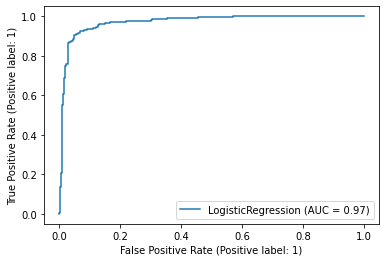

In [37]:
from sklearn.metrics import plot_roc_curve #plots the curve using matplotlib and 
#puts the AUC in the legend

plot_roc_curve(logit_2, x_test, y_test)

In [101]:
# Doing it manually
thresholds = [x / 10 for x in range(0, 11)]

"""
y_pred		y_true		y_pred-y_true		type
0				0			0				True Negative
0				1			-1			False Negative
1				0			1				False Positive
1				1			0				True Positive

True positive rate = recall
False positive rate = [count of 1 in y_pred-y_true] / [count of 0 in y_true]
"""

TPRs, FPRs = [], []
y_probas = pd.DataFrame(logit_2.predict_proba(x_test)[:, 0])

for threshold in thresholds:
  y_pred = y_probas.applymap(lambda x : 1.0 if x >= threshold else 0.0)
  
  false_pos = 0
  y_ts = 0
  for p, t in zip(y_pred[0].to_list(), y_test.to_list()):
    if t == 0: y_ts += 1
    if p == 1 and t == 0: false_pos += 1

  FPRs.append(false_pos / y_ts)
  TPRs.append(m.recall_score(y_test, y_pred))
  


In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'True Positive Rate or Recall')

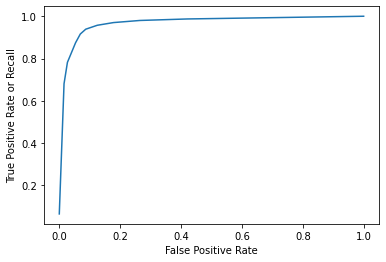

In [106]:
plt.plot(TPRs, FPRs)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate or Recall")

## Question 4

In [172]:
def k_fold_CV(k):

  import warnings
  warnings.filterwarnings("ignore")

  fold_size = len(x_train_np) // k
  leftovers = len(x_train_np) % k

  lda_errors = []
  logit_errors = []

  for i in range(k):
    x_start = x_train_np[: fold_size * i]
    x_end = x_train_np[fold_size * (i + 1):]

    y_start = y_train_np[: fold_size * i]
    y_end = y_train_np[fold_size * (i + 1):]

    x_train_k = np.concatenate((x_start, x_end))
    y_train_k = np.concatenate((y_start, y_end))

    x_val = x_train_np[fold_size * i: fold_size * (i + 1)]
    y_val = y_train_np[fold_size * i: fold_size * (i + 1)]

    ldis_k = lda()
    logit_k = LogisticRegression()

    ldis_k.fit(x_train_k, y_train_k)
    logit_k.fit(x_train_k, y_train_k)

    lda_error = 1 - m.accuracy_score(y_val, ldis_k.predict(x_val))
    logit_error = 1 - m.accuracy_score(y_val, logit_k.predict(x_val))

    lda_errors.append(lda_error) 
    logit_errors.append(logit_error)

    print(f"Fold: {i + 1}/{k} \t LDA Error: {round(lda_error, 4)} \t Logit Error: {round(logit_error, 4)}")

  print(f"\n Average Validation Error \nLDA: {round(sum(lda_errors) / len(lda_errors), 4)}\nLogit: {round(sum(logit_errors) / len(logit_errors), 4)}")

In [173]:
k_fold_CV(5)

Fold: 1/5 	 LDA Error: 0.1101 	 Logit Error: 0.0797
Fold: 2/5 	 LDA Error: 0.0942 	 Logit Error: 0.0638
Fold: 3/5 	 LDA Error: 0.113 	 Logit Error: 0.0855
Fold: 4/5 	 LDA Error: 0.1275 	 Logit Error: 0.0855
Fold: 5/5 	 LDA Error: 0.1333 	 Logit Error: 0.0957

 Average Validation Error 
LDA: 0.1157
Logit: 0.082


In [174]:
k_fold_CV(10)

Fold: 1/10 	 LDA Error: 0.1246 	 Logit Error: 0.1043
Fold: 2/10 	 LDA Error: 0.0986 	 Logit Error: 0.0522
Fold: 3/10 	 LDA Error: 0.1101 	 Logit Error: 0.0696
Fold: 4/10 	 LDA Error: 0.0899 	 Logit Error: 0.058
Fold: 5/10 	 LDA Error: 0.1362 	 Logit Error: 0.1043
Fold: 6/10 	 LDA Error: 0.0841 	 Logit Error: 0.0696
Fold: 7/10 	 LDA Error: 0.1275 	 Logit Error: 0.0899
Fold: 8/10 	 LDA Error: 0.1246 	 Logit Error: 0.0841
Fold: 9/10 	 LDA Error: 0.1478 	 Logit Error: 0.1043
Fold: 10/10 	 LDA Error: 0.1159 	 Logit Error: 0.1014

 Average Validation Error 
LDA: 0.1159
Logit: 0.0838
